In [55]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error , mean_squared_error
import matplotlib.pyplot as plt

In [56]:
# load dataset
data = pd.read_csv("Salary_dataset.csv")

In [57]:
data.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [58]:
data.drop(columns=["Unnamed: 0"], inplace=True)

In [59]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [60]:
x = data.drop(columns=["Salary"])
y = data["Salary"]

In [61]:
# split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

In [62]:
from sklearn.preprocessing import MinMaxScaler

# Scale the features
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [63]:
# Train the model on scaled training data
model = LinearRegression()
model.fit(x_train_scaled, y_train)

LinearRegression()

In [64]:
# Make predictions
y_train_pred = model.predict(x_train_scaled)
y_test_pred = model.predict(x_test_scaled)

In [65]:
# Calculate metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Training MSE:", train_mse)
print("Testing MSE:", test_mse)
print("Training R² Score:", train_r2)
print("Testing R² Score:", test_r2)
print("\nModel Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

Training MSE: 29385914.53898533
Testing MSE: 48843452.14621687
Training R² Score: 0.9577863453924944
Testing R² Score: 0.8928775350863083

Model Coefficients: [88090.34330224]
Model Intercept: 36407.46283159937


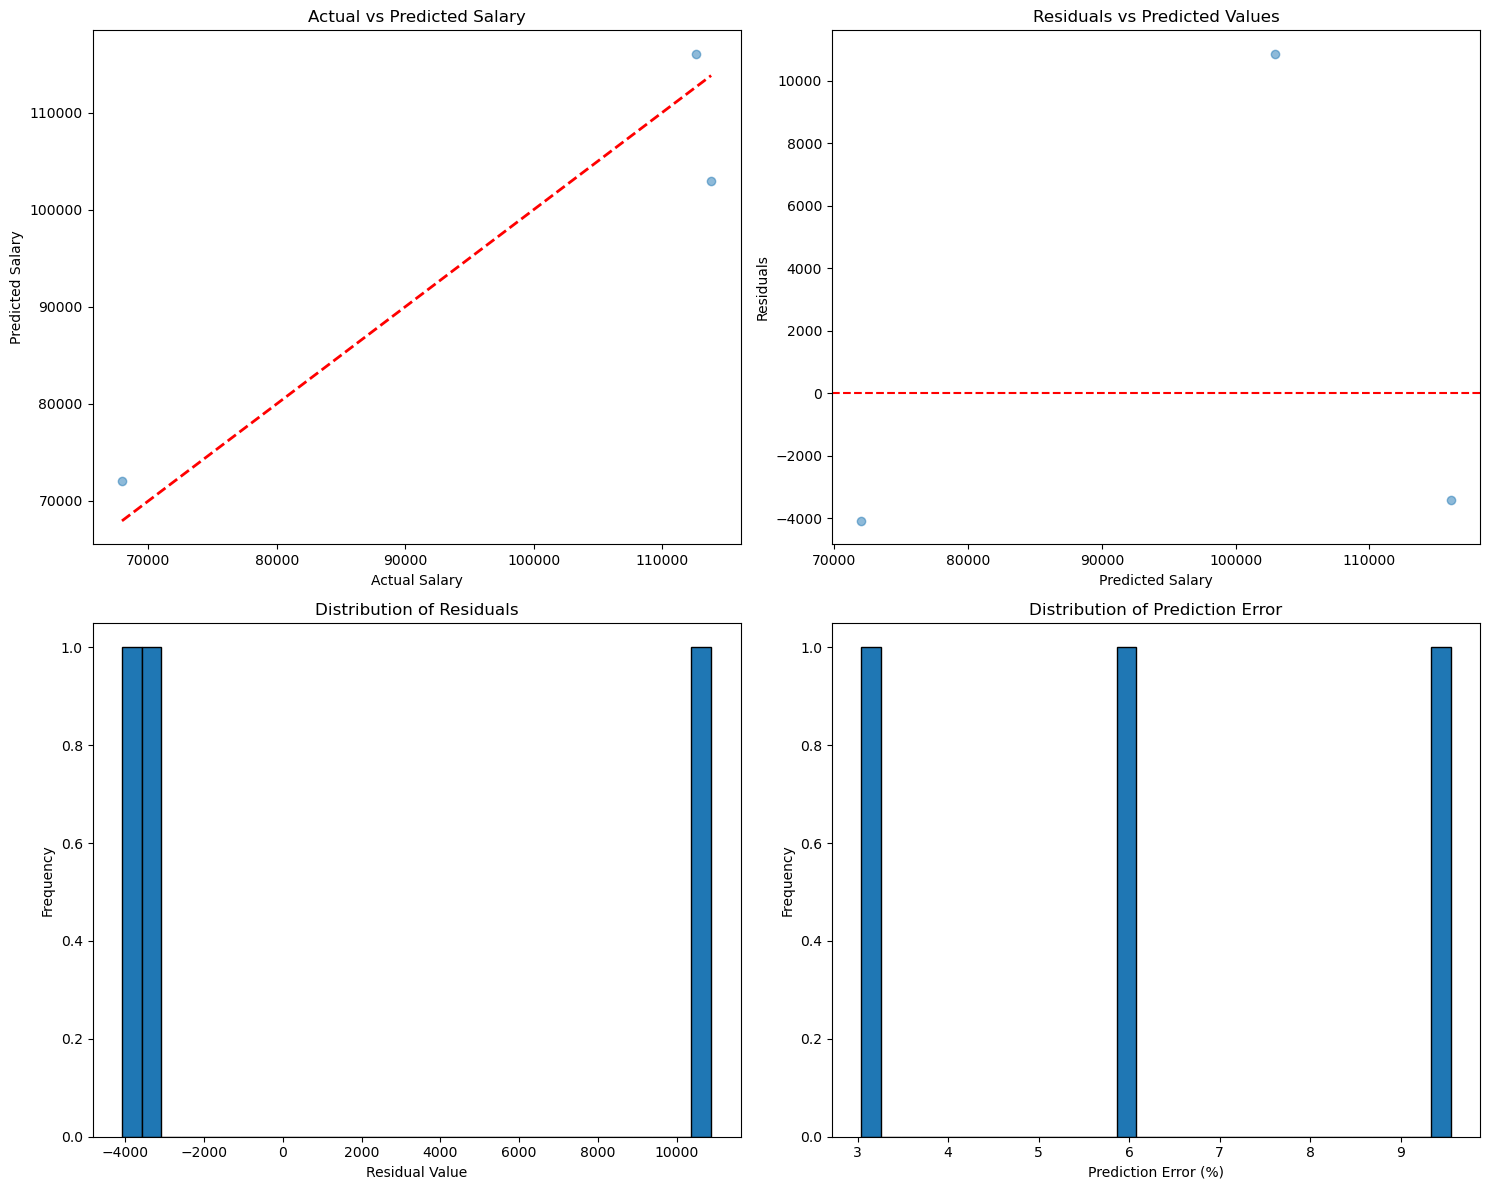


Residuals Summary Statistics:
Mean Residual: 1120.71
Std Residual: 8448.74
Mean Absolute Percentage Error: 6.20%


In [66]:
# Create a figure with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Actual vs Predicted Plot
axes[0,0].scatter(y_test, y_test_pred, alpha=0.5)
axes[0,0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0,0].set_xlabel('Actual Salary')
axes[0,0].set_ylabel('Predicted Salary')
axes[0,0].set_title('Actual vs Predicted Salary')

# 2. Residuals Plot
residuals = y_test - y_test_pred
axes[0,1].scatter(y_test_pred, residuals, alpha=0.5)
axes[0,1].axhline(y=0, color='r', linestyle='--')
axes[0,1].set_xlabel('Predicted Salary')
axes[0,1].set_ylabel('Residuals')
axes[0,1].set_title('Residuals vs Predicted Values')

# 3. Distribution of Residuals
axes[1,0].hist(residuals, bins=30, edgecolor='black')
axes[1,0].set_xlabel('Residual Value')
axes[1,0].set_ylabel('Frequency')
axes[1,0].set_title('Distribution of Residuals')

# 4. Prediction Error Plot
error_percentage = (np.abs(y_test - y_test_pred) / y_test) * 100
axes[1,1].hist(error_percentage, bins=30, edgecolor='black')
axes[1,1].set_xlabel('Prediction Error (%)')
axes[1,1].set_ylabel('Frequency')
axes[1,1].set_title('Distribution of Prediction Error')

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nResiduals Summary Statistics:")
print(f"Mean Residual: {residuals.mean():.2f}")
print(f"Std Residual: {residuals.std():.2f}")
print(f"Mean Absolute Percentage Error: {error_percentage.mean():.2f}%")